In [120]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet
from scipy.special import gamma, digamma

In [126]:
def get_comparison_axes():
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    return (
        get_ternary_axes_for_dirichlet(ax=ax1),
        get_ternary_axes_for_dirichlet(ax=ax2)
    )

def get_ternary_axes_for_dirichlet(ax):
    ## Boundary and Gridlines
    scale = 30
    figure, tax = ternary.figure(ax=ax, scale=scale)

    # Draw Boundary and Gridlines
    tax.boundary(linewidth=1.5)
    tax.gridlines(color="black", multiple=6)
    tax.gridlines(color="blue", multiple=2, linewidth=0.5)

    # Set Axis labels and Title
    fontsize = 12
    offset = 0.14
    tax.set_title("Dirichlet Distribution\n", fontsize=fontsize)
    tax.left_axis_label("$\\alpha_1$", fontsize=fontsize, offset=offset)
    tax.right_axis_label("$\\alpha_2$", fontsize=fontsize, offset=offset)
    tax.bottom_axis_label("$\\alpha_3$", fontsize=fontsize, offset=offset)

    # Background color
    tax.set_background_color(color="whitesmoke", alpha=0.7) # the detault, essentially

    # Remove default Matplotlib Axes
    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')
    
    return tax
    
def dirch(p, alphas):
    """Computes the Shannon Entropy at a distribution in the simplex."""
    if min(p) == 0:
        new_ = (np.array(p) + 0.01)
        return dirch(new_ / np.sum(new_), alphas)
    return dirichlet.pdf(p, alphas)

def KL(alphas_1, alphas_2):
    # Magnitude comparison term
    sum_1 = gamma(np.sum(alphas_1))
    sum_2 = gamma(np.sum(alphas_2))
    term_1 = np.log(sum_1 / sum_2)
    
    # Orientation comparison term
    term_2 = np.sum(
        np.log(
            gamma(alphas_1)
            / gamma(alphas_2)
        )
    )
    
    # Weighted orientation comparison term
    term_3 = np.sum(
        (alphas_1 - alphas_2)
        * (digamma(alphas_1) - np.sum(digamma(alphas_2)))
    )
    
    return term_1, term_2, term_3
    

(-0.2682430037849523, 0.20193211965967683, -0.1938956945448387)

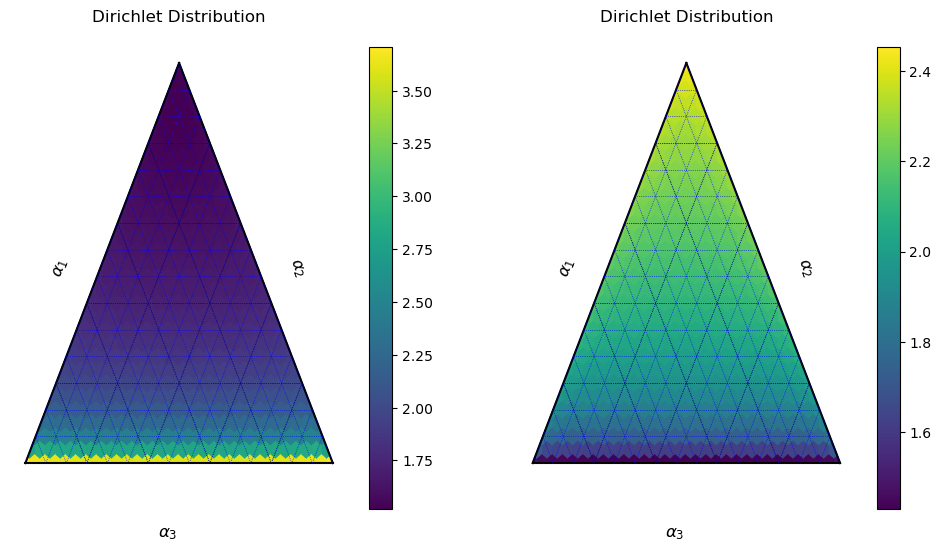

In [183]:
tax1, tax2 = get_comparison_axes()
alphas1 = np.array([0.99, 0.8, 0.99])
alphas2 = np.array([0.99, 1.1, 0.99])
tax1.heatmapf(lambda p: dirch(p, alphas1), boundary=True, style='h')
tax2.heatmapf(lambda p: dirch(p, alphas2), boundary=True, style='h')
KL(alphas1, alphas2)

In [159]:
alphas1 = np.array([0.99, 0.99, 0.99])
alphas2 = np.array([0.8, 0.8, 0.8])
display(out := KL(alphas1, alphas2))
print(sum(out))
print(sum(out[1:]))
print(sum(out[1:])/sum(out))

(0.4487827459423686, -0.43861461490538106, 1.311706455755807)

1.3218745867927946
0.8730918408504258
0.6604952160921481


In [163]:
for i in range(10):
    alphas1 = np.array([0.99, 0.99, 0.99])
    alphas2 = np.array([i/10+0.01]*3)
    out = KL(alphas1, alphas2)
    print(sum(out[1:])/sum(out))

1.0032516022811897
1.0049366015508523
0.9895612860037356
0.9633624172613837
0.9272040376306717
0.8803714691968922
0.820979045835589
0.7458099235921262
0.6497473905563662
0.5245956186761072


In [165]:
for i in range(10):
    alphas1 = np.array([0.99, 0.99, 0.99])
    alphas2 = np.array([0.99, i/10+0.01, 0.99])
    out = KL(alphas1, alphas2)
    print(sum(out[1:])/sum(out))

0.9929644665475431
0.9150841636416476
0.8359960393617754
0.7611816416699346
0.6920482952977239
0.6287613014304215
0.5710404581911143
0.5184542687327516
0.47053741788439
0.42683850783756333


In [168]:
for i in range(10):
    alphas1 = np.array([0.99, 0.99, 0.99])
    alphas2 = np.array([i/10+0.01]*3)
    print(
        (alphas1 @ alphas2)
        / (np.linalg.norm(alphas1) * np.linalg.norm(alphas2))
    )

1.0000000000000002
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0000000000000002


In [173]:
for i in range(10):
    alphas1 = np.array([0.99, 0.99, 0.99])
    alphas2 = np.array([0.99, i/10+0.01, 0.99])
    print(
        (alphas1 @ alphas2)
        / (np.linalg.norm(alphas1) * np.linalg.norm(alphas2))
    )

0.8205993697788486
0.8592097001276557
0.8931041846101601
0.922001477953326
0.9458469136837342
0.9647902152478092
0.9791448197419074
0.9893383956554502
0.9958634776150151
0.999234605291067


In [180]:
change = 1
total = 100
for i in range(10):
    alphas1 = np.array([0.99] * total)
    alphas2 = np.array([i/10+0.01] * change + [0.99] * (total-change))
    print(
        (alphas1 @ alphas2)
        / (np.linalg.norm(alphas1) * np.linalg.norm(alphas2))
    )

0.9950884433038646
0.996042042598324
0.9968928178048972
0.9976406076930077
0.9982853465829943
0.9988270641922016
0.9992658852368395
0.9996020287923161
0.9998358074159202
0.9999676260368984
